<a href="https://colab.research.google.com/github/Oruka01/Food-Sale-Predictions/blob/main/salespredictions101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Loading the the data
sales_predictions = '/content/drive/MyDrive/sales_predictions.csv'
df = pd.read_csv(sales_predictions)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### 1.  How many rows and columns?

In [4]:
# Getting the shape of the data frame
df.shape
print('There are ', df.shape,'rows and columns respectively')

There are  (8523, 12) rows and columns respectively


### 2. What are the datatypes of each variable?

In [5]:
# examining the data types in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# statistical overview of the dataset
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


## 3. Are there duplicates? If so, drop any duplicates.

In [7]:
# determining if there are duplicates in the dataset

df.duplicated().sum()

0

## 4.  Identify missing values.

In [8]:
# Identifying missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [9]:
# Getting the total number of rows and columns in the dataframe
df.shape

(8523, 12)

In [10]:
# Getting the non-null values in the item weight column
Av_values = df['Item_Weight'].count()
Av_values

7060

In [11]:
# Getting the missing values in the item weight column
null = len(df) - df['Item_Weight'].count()
null

1463

In [12]:
# Based on the number of the missing valuesas compared to ther available values, i prefer to delete the missing values in the 
# item weight coloumn because they are not significantly many to cause a big change in the resultant analysis

df.dropna(subset=['Item_Weight'], inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

6. Confirm that there are no missing values after addressing them.

In [13]:
# Deleting the Outlet_Size column because its not significant in the computation
# for the analysis also the Outlet_Location_Type column is a better substitution 

df.drop(columns='Outlet_Size', inplace=True)
df.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7 Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [14]:
# fixing the LF, Reg with the Low Fat and Regular

In [15]:
# I dentifying the unique values in the column
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')

df['Item_Fat_Content'].value_counts()


Low Fat    4566
Regular    2388
reg         106
Name: Item_Fat_Content, dtype: int64

In [17]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

 8 For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [18]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,7060.00,7060.00,7060.00,7060.00
mean,12.86,0.06,141.24,2000.49,2118.63
std,4.64,0.05,62.41,6.59,1533.45
min,4.56,0.00,31.49,1987.00,33.29
25%,8.77,0.03,94.14,1997.00,922.80
50%,12.60,0.05,142.73,2002.00,1789.67
75%,16.85,0.09,186.02,2007.00,2966.14
max,21.35,0.31,266.89,2009.00,10256.65


Histogram to view the distributions of various features in your dataset.

Text(0.5, 0, 'Tier type')

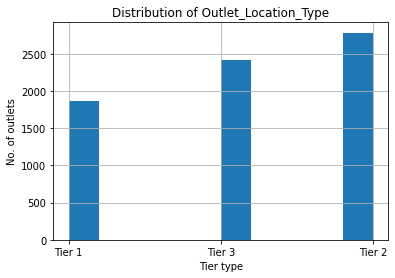

In [19]:
# Viewing the distribution of the different tiers using a histogram
df['Outlet_Location_Type'].hist()
plt.title('Distribution of Outlet_Location_Type')
plt.ylabel('No. of outlets')
plt.xlabel('Tier type')

By the histogram above its evident that Tier2 are more followed by the tier3 and then the tier1 

Text(0.5, 0, 'Outlet type')

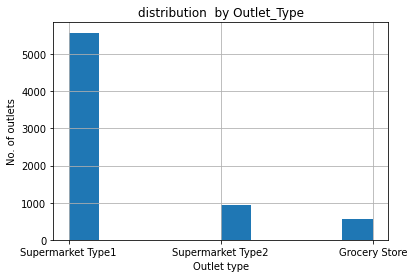

In [20]:
# Viewing the distribution of the Item_Outlet_Sales using a histogram
df['Outlet_Type'].hist(bins = 10)
plt.title('distribution  by Outlet_Type')
plt.ylabel('No. of outlets')
plt.xlabel('Outlet type')

In [21]:
# The supermarkets type1  are more followed by the type2 and lastly the grocery stores

Boxplot to view statistical summaries of various features in your dataset.

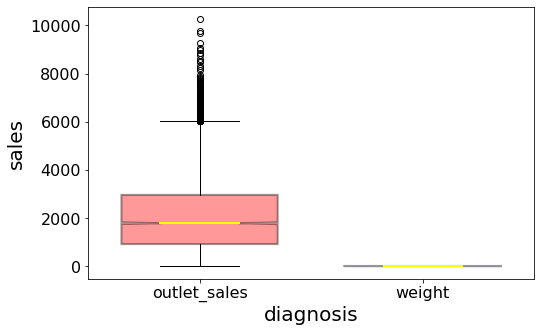

In [22]:
outlet_sales = df['Item_Outlet_Sales']
weight = df['Item_Weight']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([outlet_sales,weight],
           notch = True,
           labels=['outlet_sales', 'weight'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('diagnosis', fontsize = 20);
plt.ylabel('sales', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);


In [23]:
# the outlet sales are go beyond the usual average sales systematically. 
# The weight on the other hand seems to stay constant without any changes to the respective items sold

Heatmap of the correlation between features.

<AxesSubplot:>

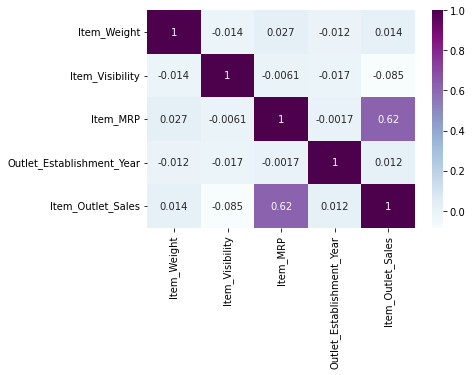

In [24]:
# Plotting the heat map to show the correlation between the various features 
corr = df.corr()
sns.heatmap(corr, cmap = 'BuPu', annot = True)


In [25]:
# There is a modorate correlation between the item MRP and the Item outlet sales.
# While there is a positive but low correlation between item MRP and Item weight, item outlet sales and outlet_est_year,
# item weight and item MRP, item weigh ann item outlet sales

Bar graph showing the sales according to item fat content

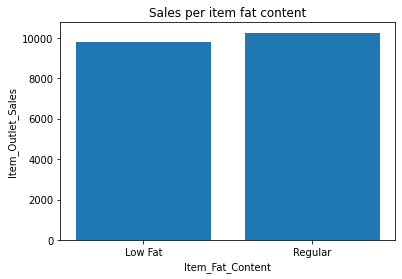

In [26]:
# This is comparing sales of Low Fat and Regular 
plt.bar(df['Item_Fat_Content'], df['Item_Outlet_Sales'])
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Sales per item fat content')
plt.show()

In [27]:
# There are more sales received from the sale of regular items compared to the low fat items much as they are closure

Bar graph showing the sales performance of each outlet

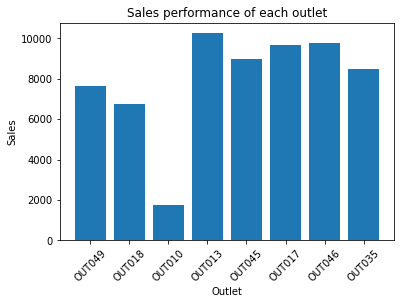

In [28]:
# Bar graph showing the sales performance of each outlet

# This is showing me how each outlet is performing in terms of sales
plt.bar(df['Outlet_Identifier'], df['Item_Outlet_Sales'])
plt.xlabel('Outlet')
plt.ylabel('Sales')
plt.title('Sales performance of each outlet')
plt.xticks(rotation = 45)
plt.show()

In [29]:
# The outlet 13 made the most sales while the outlet 010 made the least sales.

VISUALIZATIONS

In [30]:
# Creating dataframes for each outlet type
SupermktType1_df = df[df['Outlet_Type'] == 'Supermarket Type1']
SupermktType2_df = df[df['Outlet_Type'] == 'Supermarket Type2']
Grocery_store_df = df[df['Outlet_Type'] == 'Grocery Store']

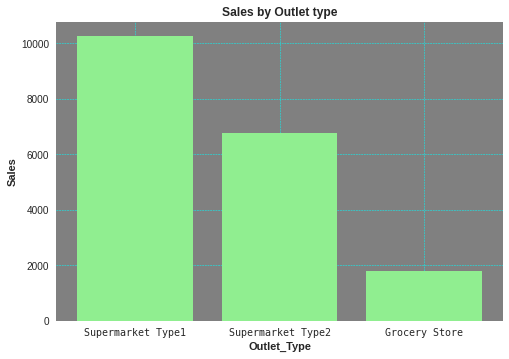

In [93]:
# Barchart showing sales as per outlet type
ax = plt.axes()
ax.set_facecolor("gray")
plt.bar(df['Outlet_Type'], df['Item_Outlet_Sales'], color = 'lightgreen')

plt.grid(color = 'cyan', linestyle = '--', linewidth = 0.5)
plt.xticks(fontsize=10, fontname='monospace')

plt.ylabel('Sales', fontweight='bold')
plt.xlabel('Outlet_Type', fontweight='bold')
plt.title('Sales by Outlet type', fontweight='bold')
plt.show()

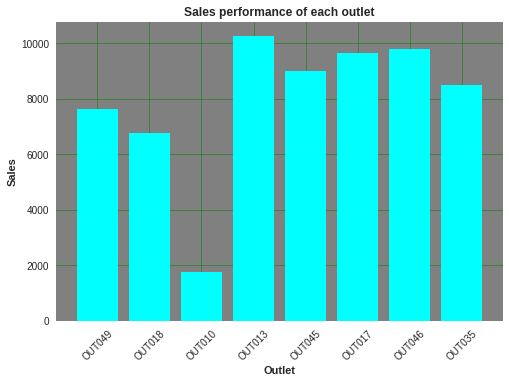

In [92]:
# Bar graph showing the sales performance of each outlet

# This is showing me how each outlet is performing in terms of sales
ax = plt.axes()
ax.set_facecolor("gray")
plt.bar(df['Outlet_Identifier'], df['Item_Outlet_Sales'], color = 'cyan')
plt.grid(color = 'green', linestyle = '-', linewidth = 0.5)
# labels
plt.xlabel('Outlet',fontweight='bold')
plt.ylabel('Sales',fontweight='bold')
plt.title('Sales performance of each outlet',fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

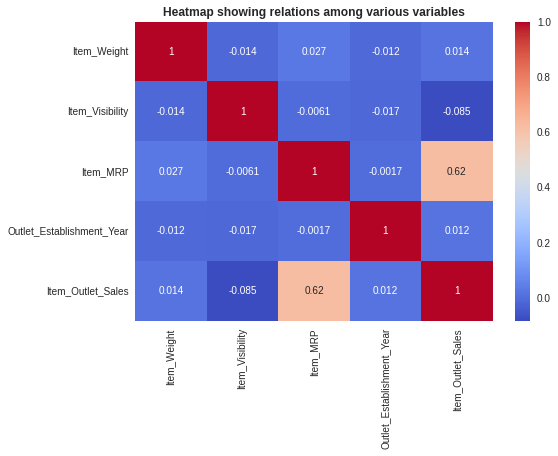

In [86]:
# Plotting the heat map to show the correlation between the various features 
ax = plt.axes()
ax.set_facecolor("gray")
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True, cbar=True,)
plt.title('Heatmap showing relations among various variables',fontweight='bold')

Boxplot

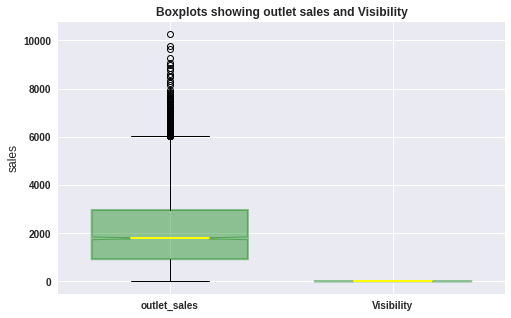

In [88]:
outlet_sales = df['Item_Outlet_Sales']
Visibility = df['Item_Visibility']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([outlet_sales,weight],
           notch = True,
           labels=['outlet_sales', 'Visibility'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='green', facecolor = 'blue', alpha = .4,)
          );
# labels
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('green')
plt.title('Boxplots showing outlet sales and Visibility',fontweight='bold')
plt.ylabel('sales', fontsize = 12);
plt.xticks(fontsize = 10,fontweight='bold');
plt.yticks(fontsize = 10,fontweight='bold');